# 1.Dependency Installation

In [288]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp


# 2. Keypoints using MP Holistic

In [289]:
mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

In [290]:
import cv2

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    image.flags.writeable = False  # Make image read-only for optimization
    results = model.process(image)  # Perform detection
    image.flags.writeable = True  # Make image writeable again
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)  # Convert back to BGR
    return image, results


In [291]:
def draw_landmarks(image, results):
    # Draw face landmarks if detected
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION
        )
    
    # Draw pose landmarks if detected
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS
        )
    
    # Draw left hand landmarks if detected
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS
        )
    
    # Draw right hand landmarks if detected
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS
        )


In [292]:
def draw_styled_landmarks(image, results):
    # Draw face landmarks
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
            mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
            mp_drawing.DrawingSpec(color=(80, 256, 121), thickness=1, circle_radius=1)
        )
    # Draw pose landmarks
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(80, 44, 121), thickness=2, circle_radius=2)
        )
    # Draw left hand landmarks
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(121, 44, 250), thickness=2, circle_radius=2)
        )
    # Draw right hand landmarks
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245, 117, 66), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(245, 66, 230), thickness=2, circle_radius=2)
        )

In [293]:
# cap = cv2.VideoCapture(0)


# # Start Mediapipe Holistic model
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
#     while cap.isOpened():
#         ret, frame = cap.read()
#         if not ret:
#             print("Failed to grab frame. Exiting...")
#             break

#         # Make detections
#         image, results = mediapipe_detection(frame, holistic)

#         draw_styled_landmarks(image, results)
#         # Print results for debugging
#         print(results)

#         # Display the processed frame
#         cv2.imshow('OpenCV Feed', image)

#         # Break gracefully on pressing 'q'
#         if cv2.waitKey(10) & 0xFF == ord('q'):
#             break

# # Release resources
# cap.release()
# cv2.destroyAllWindows()

In [294]:
len(results.face_landmarks.landmark)


468

In [295]:
results

mediapipe.python.solution_base.SolutionOutputs

In [296]:
# frame

In [297]:
draw_landmarks(frame, results)

In [298]:
# plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [299]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)


In [300]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark])


In [301]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]) if results.pose_landmarks else np.zeros((33, 4))

face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(63)

rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(63)


In [302]:
import numpy as np

def extract_keypoints(results):
    # Extract pose landmarks
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33 * 4)
    # Extract face landmarks
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468 * 3)
    # Extract left hand landmarks
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21 * 3)
    # Extract right hand landmarks
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21 * 3)
    # Concatenate all landmarks
    return np.concatenate([pose, face, lh, rh])


In [303]:
# Get keypoints from Mediapipe results
result_test = extract_keypoints(results)
print(result_test)


[ 0.53746355  0.48297623 -1.28644204 ...  0.          0.
  0.        ]


In [304]:
np.save('keypoints.npy', result_test)


In [305]:
loaded_keypoints = np.load('keypoints.npy')
print(loaded_keypoints)


[ 0.53746355  0.48297623 -1.28644204 ...  0.          0.
  0.        ]


# 4. Setup Folders for Collection

In [308]:
import os
import numpy as np

# Path for exported data (numpy arrays)
DATA_PATH = os.path.join('MP_Data')

# Actions that we are trying to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Number of sequences (e.g., videos) to capture per action
no_sequences = 60

# Number of frames per sequence
sequence_length = 30

# Starting folder index (optional, useful for appending new data)
start_folder = 0

# Create folders for each action and sequence
for action in actions:
    action_path = os.path.join(DATA_PATH, action)  # Define path for the action
    os.makedirs(action_path, exist_ok=True)  # Create action folder if it doesn't exist

    for sequence in range(start_folder, start_folder + no_sequences):
        sequence_path = os.path.join(action_path, str(sequence))
        os.makedirs(sequence_path, exist_ok=True)  # Create sequence folder if it doesn't exist


# 5. Collect Keypoint Values for training and testing

In [309]:
import cv2
import numpy as np
import os

# Define parameters
DATA_PATH = os.path.join('MP_Data')
actions = ['hello']  # Collecting only for 'hello'
no_sequences = 60  # Number of videos to collect
sequence_length = 30  # Frames per video
start_folder = 0  # Starting sequence number

cap = cv2.VideoCapture(0)

# Set Mediapipe model
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    try:
        for action in actions:
            for sequence in range(start_folder, start_folder + no_sequences):
                for frame_num in range(sequence_length):
                    ret, frame = cap.read()
                    if not ret:
                        print("Failed to grab frame. Skipping...")
                        break

                    # Make detections
                    image, results = mediapipe_detection(frame, holistic)

                    # Draw landmarks
                    draw_styled_landmarks(image, results)

                    # Display status
                    if frame_num == 0:
                        cv2.putText(image, 'STARTING COLLECTION', (120, 200),
                                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                        cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15, 12),
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        cv2.imshow('OpenCV Feed', image)
                        cv2.waitKey(500)
                    else:
                        cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15, 12),
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        cv2.imshow('OpenCV Feed', image)

                    # Extract keypoints and save
                    keypoints = extract_keypoints(results)
                    npy_path = os.path.join(DATA_PATH, action, str(sequence), f'{frame_num}.npy')
                    os.makedirs(os.path.dirname(npy_path), exist_ok=True)
                    np.save(npy_path, keypoints)

                    # Break gracefully if 'q' is pressed
                    if cv2.waitKey(10) & 0xFF == ord('q'):
                        break
    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        cap.release()
        cv2.destroyAllWindows()


In [310]:
# Change the action to 'iloveyou'
actions = ['iloveyou']  # Collecting only for 'iloveyou'
start_folder = 0  # Reset starting sequence number

cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    try:
        for action in actions:
            for sequence in range(start_folder, start_folder + no_sequences):
                for frame_num in range(sequence_length):
                    ret, frame = cap.read()
                    if not ret:
                        print("Failed to grab frame. Skipping...")
                        break

                    image, results = mediapipe_detection(frame, holistic)
                    draw_styled_landmarks(image, results)

                    if frame_num == 0:
                        cv2.putText(image, 'STARTING COLLECTION', (120, 200),
                                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                        cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15, 12),
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        cv2.imshow('OpenCV Feed', image)
                        cv2.waitKey(500)
                    else:
                        cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15, 12),
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        cv2.imshow('OpenCV Feed', image)

                    keypoints = extract_keypoints(results)
                    npy_path = os.path.join(DATA_PATH, action, str(sequence), f'{frame_num}.npy')
                    os.makedirs(os.path.dirname(npy_path), exist_ok=True)
                    np.save(npy_path, keypoints)

                    if cv2.waitKey(10) & 0xFF == ord('q'):
                        break
    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        cap.release()
        cv2.destroyAllWindows()


In [311]:
# Change the action to 'thanks'
actions = ['thanks']  # Collecting only for 'thanks'
start_folder = 0  # Reset starting sequence number

cap = cv2.VideoCapture(0)

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    try:
        for action in actions:
            for sequence in range(start_folder, start_folder + no_sequences):
                for frame_num in range(sequence_length):
                    ret, frame = cap.read()
                    if not ret:
                        print("Failed to grab frame. Skipping...")
                        break

                    image, results = mediapipe_detection(frame, holistic)
                    draw_styled_landmarks(image, results)

                    if frame_num == 0:
                        cv2.putText(image, 'STARTING COLLECTION', (120, 200),
                                    cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                        cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15, 12),
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        cv2.imshow('OpenCV Feed', image)
                        cv2.waitKey(500)
                    else:
                        cv2.putText(image, f'Collecting frames for {action} Video Number {sequence}', (15, 12),
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                        cv2.imshow('OpenCV Feed', image)

                    keypoints = extract_keypoints(results)
                    npy_path = os.path.join(DATA_PATH, action, str(sequence), f'{frame_num}.npy')
                    os.makedirs(os.path.dirname(npy_path), exist_ok=True)
                    np.save(npy_path, keypoints)

                    if cv2.waitKey(10) & 0xFF == ord('q'):
                        break
    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        cap.release()
        cv2.destroyAllWindows()


# 6. Preprocessing 

In [312]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Parameters
DATA_PATH = 'MP_Data'
actions = np.array(['hello', 'thanks', 'iloveyou'])
sequence_length = 30

# Map actions to labels
label_map = {label: num for num, label in enumerate(actions)}

# Load sequences and labels
sequences, labels = [], []
for action in actions:
    action_path = os.path.join(DATA_PATH, action)
    for sequence in np.array(os.listdir(action_path)).astype(int):
        window = []
        for frame_num in range(sequence_length):
            npy_path = os.path.join(action_path, str(sequence), f'{frame_num}.npy')
            res = np.load(npy_path)
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

# Convert to arrays
X = np.array(sequences)
y = to_categorical(labels).astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

# Print shapes
print("X shape:", X.shape)
print("y shape:", y.shape)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X shape: (180, 30, 1662)
y shape: (180, 3)
X_train shape: (171, 30, 1662)
X_test shape: (9, 30, 1662)
y_train shape: (171, 3)
y_test shape: (9, 3)


# 7. Building Model - LSTM Neural Network

In [366]:
import os
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping

# TensorBoard callback setup
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Define actions (categories) and other parameters
actions = np.array(['hello', 'thanks', 'iloveyou'])
sequence_length = 30  # Number of frames per sequence
input_features = 1662  # Number of features per frame

# Build the LSTM model
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(sequence_length, input_features)))
model.add(LSTM(128, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(actions), activation='softmax'))  # Output layer for 3 categories

# Compile the model
model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['categorical_accuracy']
)

# Print model summary
model.summary()



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 30, 64)            442112    
                                                                 
 lstm_21 (LSTM)              (None, 128)               98816     
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 3)                 195       
                                                                 
Total params: 549379 (2.10 MB)
Trainable params: 549379 (2.10 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [367]:
history = model.fit(
    X_train, y_train,
    epochs=200,
    validation_data=(X_test, y_test),
    batch_size=16,
    callbacks=[tb_callback]  # Add EarlyStopping if needed
)


Epoch 1/200
11/11 [==============================] - 5s 133ms/step - loss: 2.6075 - categorical_accuracy: 0.3275 - val_loss: 0.9712 - val_categorical_accuracy: 0.4444
Epoch 2/200
11/11 [==============================] - 1s 91ms/step - loss: 0.6674 - categorical_accuracy: 0.6959 - val_loss: 0.1019 - val_categorical_accuracy: 1.0000
Epoch 3/200
11/11 [==============================] - 1s 96ms/step - loss: 0.2460 - categorical_accuracy: 0.9474 - val_loss: 1.1695 - val_categorical_accuracy: 0.5556
Epoch 4/200
11/11 [==============================] - 1s 89ms/step - loss: 0.3555 - categorical_accuracy: 0.8947 - val_loss: 0.1359 - val_categorical_accuracy: 1.0000
Epoch 5/200
11/11 [==============================] - 1s 87ms/step - loss: 0.0813 - categorical_accuracy: 0.9942 - val_loss: 0.3674 - val_categorical_accuracy: 0.7778
Epoch 6/200
11/11 [==============================] - 1s 91ms/step - loss: 0.2456 - categorical_accuracy: 0.9064 - val_loss: 0.0038 - val_categorical_accuracy: 1.0000
Epo

KeyboardInterrupt: 

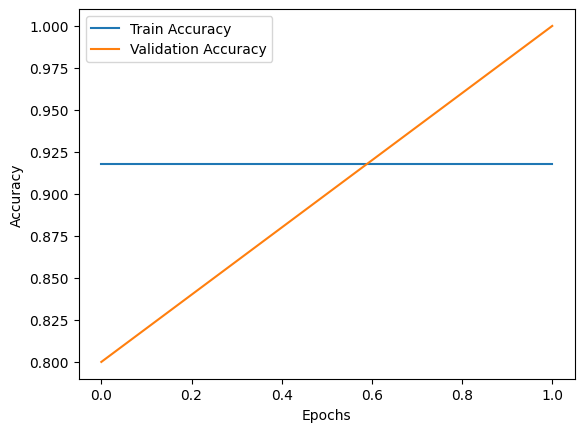

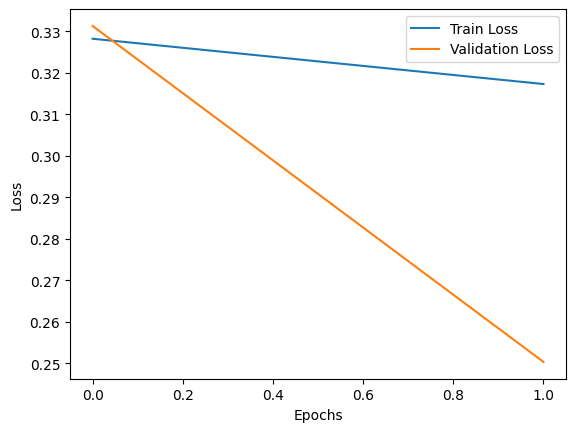

In [368]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history.history['categorical_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [369]:
model.save('action.h5')  # Saves the architecture, weights, and training configuration.


c:\Users\hetb0\Desktop\Projects\ASL_translator\.venv\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# model = Sequential()
# model.add(LSTM(32, return_sequences=True, activation='relu', input_shape=(30, 1662)))
# model.add(LSTM(64, return_sequences=False, activation='relu'))
# model.add(Dense(32, activation='relu'))
# model.add(Dense(len(actions), activation='softmax'))  # Use len(actions) to determine the number of classes
# model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])


In [243]:

# # Compile the model
# model.compile(
#     optimizer='Adam',
#     loss='categorical_crossentropy',
#     metrics=['categorical_accuracy']
# )



# model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

In [ ]:
# from tensorflow.keras.callbacks import Callback

# # Custom callback to stop training when accuracy > 90%
# class StopTrainingAt90(Callback):
#     def on_epoch_end(self, epoch, logs=None):
#         if logs.get('val_categorical_accuracy') > 0.90:
#             print(f"\nStopping training as validation accuracy reached {logs.get('val_categorical_accuracy'):.2%}")
#             self.model.stop_training = True

# # Add this callback to your model's training
# stop_at_90 = StopTrainingAt90()

# # Train the model with this callback
# history = model.fit(a
#     X_train, y_train,
#     validation_data=(X_test, y_test),
#     epochs=2000,  # Set a high number to allow the callback to stop early
#     callbacks=[tb_callback, stop_at_90]  # Add the custom callback
# )


In [370]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_20 (LSTM)              (None, 30, 64)            442112    
                                                                 
 lstm_21 (LSTM)              (None, 128)               98816     
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 3)                 195       
                                                                 
Total params: 549379 (2.10 MB)
Trainable params: 549379 (2.10 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 8. Making Predictions 

In [371]:
res = model.predict(X_test)

1/1 [==============================] - 0s 343ms/step


In [372]:
actions[np.argmax(res[3])]

'thanks'

In [373]:
actions[np.argmax(y_test[1])]

'hello'

In [374]:
model.save('action.h5')

# 9. Model Evaluation 

In [375]:
from sklearn.metrics import classification_report
print(classification_report(ytrue, yhat, target_names=actions))

              precision    recall  f1-score   support

       hello       1.00      1.00      1.00         4
      thanks       1.00      1.00      1.00         3
    iloveyou       1.00      1.00      1.00         2

    accuracy                           1.00         9
   macro avg       1.00      1.00      1.00         9
weighted avg       1.00      1.00      1.00         9



In [376]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(model.predict(X_test), axis=1).tolist()


1/1 [==============================] - 0s 51ms/step


In [377]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[5, 0],
        [0, 4]],

       [[6, 0],
        [0, 3]],

       [[7, 0],
        [0, 2]]], dtype=int64)

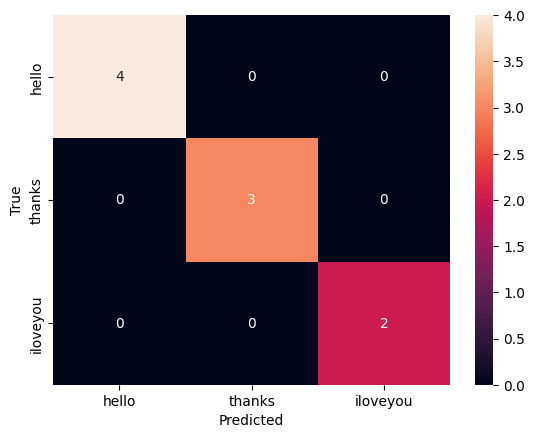

In [378]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(ytrue, yhat)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=actions, yticklabels=actions)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [379]:
accuracy_score(ytrue,yhat)

1.0

# 10. Real Time Model Test 

In [380]:
from scipy import stats
from matplotlib import pyplot as plt


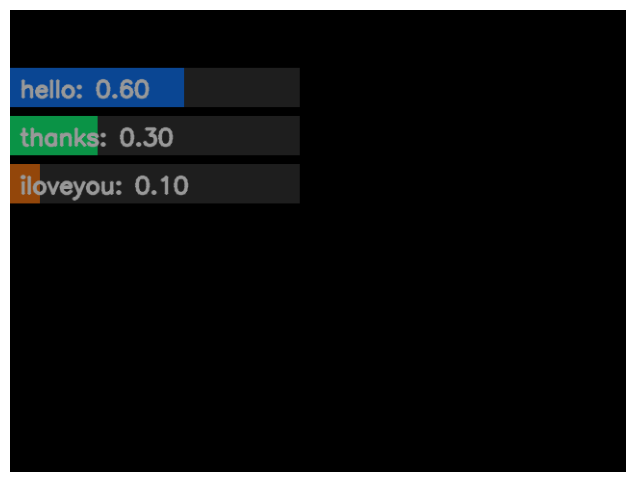

In [381]:
from scipy import stats
from matplotlib import pyplot as plt
import numpy as np
import cv2

# Define action colors
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245)]

def prob_viz(res, actions, input_frame, colors):
    """
    Visualize the probabilities for each action by overlaying rectangles and labels on the frame.

    Args:
        res (list or np.array): The probabilities predicted by the model for each action.
        actions (list): The list of action names.
        input_frame (np.array): The input video frame.
        colors (list): A list of colors for each action.

    Returns:
        np.array: The output frame with visualized probabilities.
    """
    output_frame = input_frame.copy()  # Make a copy of the frame to draw on
    overlay = output_frame.copy()  # Create an overlay for transparency
    alpha = 0.6  # Transparency level

    for num, prob in enumerate(res):
        prob = float(prob)  # Ensure prob is a scalar
        # Draw semi-transparent background for the bar
        cv2.rectangle(overlay, (0, 60 + num * 50), (300, 100 + num * 50), (50, 50, 50), -1)
        # Draw the probability bar
        cv2.rectangle(overlay, (0, 60 + num * 50), (int(prob * 300), 100 + num * 50), colors[num], -1)
        # Add action text with the probability
        cv2.putText(overlay, f'{actions[num]}: {prob:.2f}', 
                    (10, 90 + num * 50), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 255), 2, cv2.LINE_AA)
    
    # Blend the overlay with the original frame
    cv2.addWeighted(overlay, alpha, output_frame, 1 - alpha, 0, output_frame)
    return output_frame

# Example usage
res = np.array([0.6, 0.3, 0.1])  # Example probabilities
actions = ['hello', 'thanks', 'iloveyou']  # Example actions
colors = [(245, 117, 16), (117, 245, 16), (16, 117, 245)]  # Colors for visualization

# Create a blank input frame (for demonstration purposes)
image = np.zeros((480, 640, 3), dtype=np.uint8)

# Plot the visualization
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(prob_viz(res, actions, image, colors), cv2.COLOR_BGR2RGB))
plt.axis('off')  # Remove axis for better visualization
plt.show()


In [382]:
# Import necessary libraries
import cv2
import numpy as np
import mediapipe as mp

# Detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.7  # Confidence threshold

# Initialize webcam
cap = cv2.VideoCapture(0)

# Mediapipe model setup
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    try:
        while cap.isOpened():
            # Read video frame
            ret, frame = cap.read()
            if not ret:
                print("Failed to grab frame. Exiting...")
                break

            # Perform Mediapipe detections
            image, results = mediapipe_detection(frame, holistic)
            
            # Draw landmarks on the frame
            draw_styled_landmarks(image, results)

            # Extract keypoints for prediction
            keypoints = extract_keypoints(results)
            sequence.append(keypoints)
            sequence = sequence[-30:]  # Keep only the last 30 frames

            # Prediction logic
            if len(sequence) == 30:
                # Predict the action using the trained model
                res = model.predict(np.expand_dims(sequence, axis=0))[0]
                print(f"Predicted Action: {actions[np.argmax(res)]}, Confidence: {res[np.argmax(res)]:.2f}")
                predictions.append(np.argmax(res))

                # Stable predictions logic
                if np.unique(predictions[-10:])[0] == np.argmax(res):
                    if res[np.argmax(res)] > threshold:
                        # Add to the sentence only if different from the last action
                        if len(sentence) == 0 or actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])

                # Keep only the last 5 sentences
                if len(sentence) > 5:
                    sentence = sentence[-5:]

                # Add visualization to the frame
                image = prob_viz(res, actions, image, colors)

            # Add a title bar
            cv2.rectangle(image, (0, 0), (640, 60), (0, 0, 0), -1)  # Black background
            cv2.putText(image, 'Real-Time Gesture Recognition', (10, 40),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

            # Display the predicted sentence
            cv2.rectangle(image, (0, 420), (640, 480), (245, 117, 16), -1)  # Orange bar
            cv2.putText(image, ' '.join(sentence), (10, 460),
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

            # Show the frame with the visualizations
            cv2.imshow('OpenCV Feed', image)

            # Break gracefully on pressing 'q'
            if cv2.waitKey(10) & 0xFF == ord('q'):
                break

    except Exception as e:
        print(f"An error occurred: {e}")

    finally:
        # Release resources
        cap.release()
        cv2.destroyAllWindows()


1/1 [==============================] - 0s 31ms/step
Predicted Action: iloveyou, Confidence: 1.00
1/1 [==============================] - 0s 38ms/step
Predicted Action: iloveyou, Confidence: 1.00
1/1 [==============================] - 0s 35ms/step
Predicted Action: iloveyou, Confidence: 1.00
1/1 [==============================] - 0s 37ms/step
Predicted Action: iloveyou, Confidence: 1.00
1/1 [==============================] - 0s 32ms/step
Predicted Action: iloveyou, Confidence: 1.00
1/1 [==============================] - 0s 37ms/step
Predicted Action: iloveyou, Confidence: 1.00
1/1 [==============================] - 0s 38ms/step
Predicted Action: iloveyou, Confidence: 1.00
1/1 [==============================] - 0s 33ms/step
Predicted Action: iloveyou, Confidence: 0.99
1/1 [==============================] - 0s 27ms/step
Predicted Action: iloveyou, Confidence: 0.99
1/1 [==============================] - 0s 25ms/step
Predicted Action: iloveyou, Confidence: 0.98
1/1 [=========================